## Inferential Statistics

Inferential Statistics is about the 'leap of faith' required to make observations on a sample of the population and then extend them to the entire population.

## 1. Sampling and Sampling Distributions: Techniques (simple random sampling, stratified sampling), sampling distribution of the sample mean and proportion.

### Sample vs Population

Inferential Statistics is all about making inferences or deriving insights about a larger group or dataset, on the basis of a part- or sample. This larger group, or dataset is known as the population.

**Population**: The entire group that you want to study or make inferences about.

**Sample**: A subset of the population that is actually observed.

*Simplified guide on how to choose a sample:*

**Define Your Population:** First, identify the entire group you're interested in studying. This could be all the students in a school, all the customers of a business, or any other defined group.

**Decide on the Sample Size:** How many people or items (units) you'll include in your sample depends on factors like the size of your population, the resources you have available, and how accurate you need your results to be. Generally, larger samples give more accurate results, but they're also more expensive and time-consuming to collect.

**Choose a Sampling Method:** There are several methods to choose from:

* Random Sampling: Every unit in your population has an equal chance of being selected. This can be done using random number generators or drawing names out of a hat.

* Stratified Sampling: Divide your population into subgroups (strata) and then randomly sample from each group. This ensures that all significant subgroups are represented in your sample.

* Systematic Sampling:Select units at regular intervals from an ordered list - for example, every 10th person on a list.

* Cluster Sampling: Divide the population into clusters, then randomly select some clusters and sample all units within these clusters.

* Convenience Sampling: Choose units that are easy to access. This method is less reliable because it's not random and might not represent the population well.

**Collect Your Data:** Once you've selected your sample, go ahead and collect your data by observing, surveying, testing, or whatever method is appropriate for your study.

**Check for Bias:** After data collection, analyze your sample to ensure it's representative of your population. If your sample is biased, your results might not be valid for the whole population.

Remember, the goal in sampling is to choose a subset of the population that accurately represents the whole, allowing you to make generalizations about the population based on your sample.

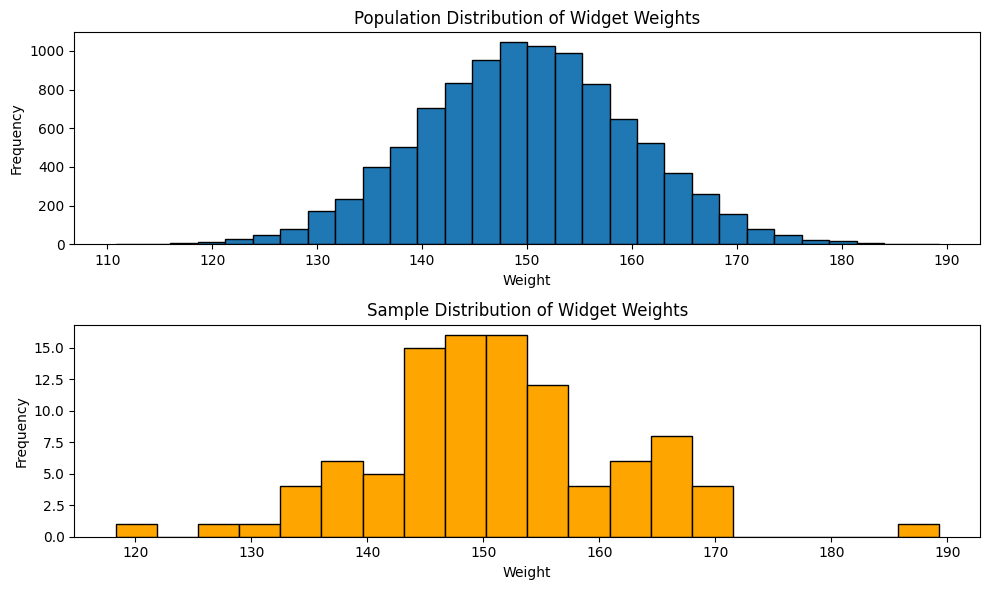

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
# (Many functions in Python that involve randomness use a deterministic algorithm that starts with a seed value to generate seemingly random numbers.)
# Setting a seed ensures that every time you run the code, you get the same sequence of "random" numbers. This is crucial when you want your results to be reproducible.
# If you didn't set a seed, every time you ran the code, you'd get a different set of random numbers, and your results might vary. 

np.random.seed(42)

# Generate a population of widget weights (not necessarily normally distributed)
# loc (location or mean): This means that, on average, the generated numbers will be centered around 150.
# scale (standard deviation)
population_weights = np.random.normal(loc=150, scale=10, size=10000)

# Take a sample from the population
sample_size = 100
sample = np.random.choice(population_weights, size=sample_size, replace=False)

# Plot the population and the sample
plt.figure(figsize=(10, 6))

# Population histogram
plt.subplot(2, 1, 1)
plt.hist(population_weights, bins=30, edgecolor='black')
plt.title('Population Distribution of Widget Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Sample histogram
plt.subplot(2, 1, 2)
plt.hist(sample, bins=20, color='orange', edgecolor='black')
plt.title('Sample Distribution of Widget Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Confidence Intervals:

**What it is**: An estimated range of values which is likely to include an unknown population parameter, calculated from a given set of sample data.

**Example**: Estimating the average height of a population with a 95% confidence interval.

### Central Limit Theorem (CLT)

The Central Limit Theorem states that, for a sufficiently large sample size, the sampling distribution of the sample mean (or any other statistic) will be approximately normally distributed, regardless of the original distribution of the population.

#### Scenario:
Imagine you are a factory manager and you want to know the average weight of all the widgets your factory produces. However, weighing every single widget is impractical, so you decide to take small samples.

**Step 1**: Take Samples:
You randomly select 30 widgets from the production line and weigh each one. You record the average weight of these 30 widgets.

**Step 2**: Repeat the Process:
You repeat this process many times, each time taking a new random sample of 30 widgets and calculating the average weight.

**Step 3**: Observe the Distribution:
Now, according to the Central Limit Theorem, the distribution of these average weights will start to look like a normal distribution, even if the weights of individual widgets are not normally distributed.

**Step 4**: Make an Educated Guess:
* After taking many samples and observing the distribution of average weights, you notice that it forms a nice bell-shaped curve. Now, you can make an educated guess about the average weight of all widgets produced by your factory.
* For example, you might find that the average of your sample averages is 150 grams, and the standard deviation is 5 grams.
* With this information, you can say something like, "Based on my samples, I am 95% confident that the true average weight of all widgets produced by our factory is between 145 grams and 155 grams."

Key Points:

* The more samples you take (following the Central Limit Theorem magic), the more confident you can be in your estimate.
* The normal distribution assumption allows you to use statistical methods that rely on normal distributions, such as calculating confidence intervals and performing hypothesis tests.

Estimated Population Mean: 150.00
Confidence Interval (95.0%): (146.36, 153.65)


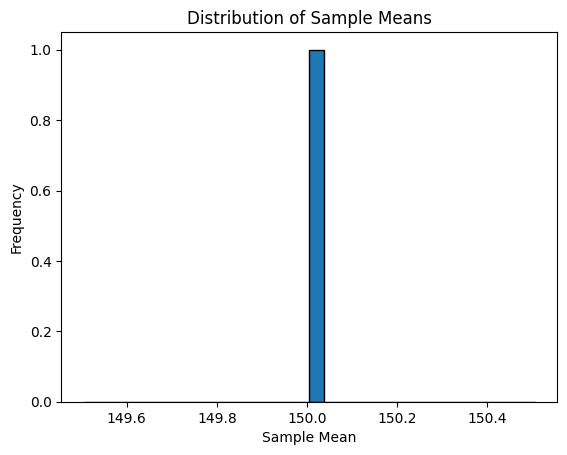

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(42)

# Generate a population of widget weights (not necessarily normally distributed)
population_weights = np.random.normal(loc=150, scale=10, size=10000)

# Function to take random samples and calculate confidence intervals
def estimate_population_mean(sample_size, num_samples, confidence_level):
    sample_means = []

    for _ in range(num_samples):
        sample = np.random.choice(population_weights, size=sample_size, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)

    # Calculate confidence interval
    lower_bound, upper_bound = norm.interval(confidence_level, loc=np.mean(sample_means), scale=np.std(sample_means))

    return np.mean(sample_means), lower_bound, upper_bound

# Parameters
sample_size = 30
num_samples = 1000
confidence_level = 0.95

# Estimate population mean and confidence interval
mean_estimate, lower_bound, upper_bound = estimate_population_mean(sample_size, num_samples, confidence_level)

# Print results
print(f"Estimated Population Mean: {mean_estimate:.2f}")
print(f"Confidence Interval ({confidence_level*100}%): ({lower_bound:.2f}, {upper_bound:.2f})")

# Plot the distribution of sample means
plt.hist(mean_estimate, bins=30, edgecolor='black')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()


The histogram in the plot shows how the average weights of your groups tend to cluster around a certain value.

## 2. Hypothesis Testing Fundamentals: Null and alternative hypotheses, type I and II errors, power of a test, significance level, p-value, one-tail vs. two-tail tests.

### Hypothesis Testing:

**What it is**: A systematic way to test claims or hypotheses about a population parameter using sample data.

**Example**: Testing whether the average test scores of two groups are significantly different.

**Hypothesis**: A hypothesis is a testable statement or prediction that is proposed to explain a phenomenon or make a prediction about the outcome of a research study.

Here are the key elements of a hypothesis:

**Clear Statement:** A hypothesis is a clear and concise statement that expresses a relationship between variables or makes a specific prediction.

**Testable:** It must be possible to test the hypothesis through empirical observation or experimentation. This means there should be a way to collect data that either supports or refutes the hypothesis. Hypothesis which is not testable is just a **Claim**

**Specific Predictions:** A hypothesis often includes predictions about the expected outcome of an experiment or study. These predictions help guide the research and provide a basis for comparison with the actual results.

**Falsifiability:** A good scientific hypothesis is falsifiable, meaning that there is a potential for the hypothesis to be proven false through empirical evidence. If a hypothesis cannot be tested or potentially refuted, it is not scientifically useful

### Errors In hypothesis testing

In hypothesis testing, there are two main types of errors that can occur: Type I error and Type II error.

**Type I Error**:

* Definition: Type I error occurs when the null hypothesis (H0
) is incorrectly rejected when it is actually true. In other words, it's a false positive.
* Symbolically: α (alpha) represents the probability of making a Type I error.
* Example: If you conclude that a new drug is effective when it has no real effect (null hypothesis is true), that's a Type I error.
  
**Type II Error**:

* Definition: Type II error occurs when the null hypothesis is not rejected when it is actually false. It's a false negative.
* Symbolically: β (beta) represents the probability of making a Type II error.
* Example: If you fail to conclude that a new drug is effective when it actually has a real effect (null hypothesis is false), that's a Type II error.
  
**Trade-off between Type I and Type II Errors:**

* Inverse Relationship: There is often a trade-off between Type I and Type II errors. As you decrease the probability of one type of error, you typically increase the probability of the other.
* Significance Level (α): Researchers choose a significance level (α) as the maximum acceptable probability of a Type I error. Common values are 0.05 or 0.01.
* Power of the Test: The power of a test is 1−β, representing the probability of correctly rejecting a false null hypothesis (avoiding a Type II error).

Key Points:

* Balancing Act: Hypothesis testing involves a balancing act between these two types of errors.
* Context Matters: The relative importance of Type I and Type II errors depends on the specific context and consequences of the decision.
* Critical in Medical and Legal Fields: In fields like medicine and law, minimizing Type I and Type II errors is critical for making accurate and meaningful decisions.

Understanding and managing these errors is crucial in hypothesis testing to ensure the validity and reliability of research findings. It involves making informed choices about the acceptable level of risk for each type of error based on the goals and implications of the study.

The null hypothesis (H 0) and alternative hypothesis (H a)  or (H 1) are fundamental concepts in hypothesis testing. They represent competing statements about a population parameter that researchers aim to test.

**Null Hypothesis (H 0):**

* Definition: The null hypothesis is a statement that there is no significant difference or effect. It represents a **default or status quo** assumption that there is no change or no relationship.
* Symbolically: H 0 :μ=μ 0  (for a population mean) or H 0 :p=p0  (for a population proportion).
* Example: If a new drug has no effect, the null hypothesis might be H 0 :μ new drug=μ placebo, indicating no difference in average effectiveness.

**Alternative Hypothesis (Ha  or H1 ):**

* Definition: The alternative hypothesis is a statement that contradicts the null hypothesis. It suggests that there is a significant difference or effect.
* Symbolically: Ha:μ≠μ0 (for a two-sided test) or Ha:μ>μ0 or Ha:μ<μ0 (for one-sided tests) or Ha:p≠p0  or Ha:p>p0 or Ha:p<p0 (for proportions).
* Example: The alternative hypothesis for the drug example might be H0 :μ new drug> μ placebo,, indicating that the new drug is more effective.



**Situation 1:** 
Company claimed that its total sales was at least $1 million. Here, the claim contains the ≥ sign (i.e., the at least sign), and so the null hypothesis is the original claim.

The hypothesis in this case can be formulated as:

* Sales>= 1 million dollar --> Null Hypothesis  (with equal sign)
* Sales < 1 million dollar --> Alternate Hypotheis  (no equal sign)
Hypotheses for Situation 1

**Situation 2:** 
Company claimed that its total sales was greater than $1 million. Here, the claim contains the > sign (i.e., the ‘more than’ sign), and so the null hypothesis is the complement of the original claim.

The hypothesis in this case can be formulated as:
* Sales<= 1 million dollar --> Null Hypothesis  (with equal sign)
* Sales > 1 million dollar --> Alternate Hypotheis  (no equal sign)
Hypotheses for Situation 2



**Hypothesis Testing Process**

1. Establish a null and alternate hypothesis
2. Determine the appropriate statistical test
3. Set the value of alpha- 0.05, 0.01 or 0.1 based on the level of confidence
4. Establish the decision rule, stating the conditions for valiation of null hypothesis
5. Gather sample data
6. Conduct data analysis
7. reach statistical conclusion
8. Make decision

Probability of a Type-1 Error	Confidence Level
1% or 0.01	                   99%
5% or 0.05	                   95%
10% or 0.1	                   90%
 
So, what does this actually mean?

 Basically, when we are setting the alpha value to 5%, we are saying,
 
"I want to be able to reject the null hypothesis with 95% confidence, or I want the probability of rejecting a true null hypothesis to be 5%"

#### Significance Level (α)
The significance level, denoted as α (alpha), is a threshold set by the researcher before conducting a hypothesis test. It represents the probability of rejecting the null hypothesis when it is actually true, known as a Type I error. The significance level is a measure of the risk one is willing to take of making such an error. Common values for α include 0.05 (5%), 0.01 (1%), and 0.10 (10%). Choosing a lower α makes the criteria for rejecting the null hypothesis more stringent.



#### P-value
The p-value is the probability of observing the test results (or more extreme results) assuming that the null hypothesis is true. It is a measure of the evidence against the null hypothesis provided by the sample data. If the p-value is less than or equal to the significance level (p ≤ α), the null hypothesis is rejected in favor of the alternative hypothesis. This indicates that the observed data are statistically significant at the specified α level. Conversely, if the p-value is greater than α, there isn't enough evidence to reject the null hypothesis, and it's concluded that the observed result could reasonably occur by chance under the null hypothesis.

##### Example 

Let's say you're claiming that a coin is lucky and always lands on heads. To test this, you flip the coin 10 times, and it lands on heads 9 times.

The p-value in this scenario tells us how surprising it is to see the coin land on heads 9 out of 10 times if the coin were just a regular coin (not lucky).

If the p-value is low (like 0.01), it means it's very surprising to get this result if the coin were normal. A low p-value suggests that maybe the coin really is lucky, or in statistical terms, our result is significant, and we have reason to doubt the coin is normal.

So, less p-value means more surprising because it shows how unlikely it is to see what we observed if we assumed there was nothing special going on (like having a regular coin).


#### One-Tail vs. Two-Tail Tests
The choice between a one-tailed and a two-tailed test depends on the nature of the research question or hypothesis.

One-Tail Test: Used when the research hypothesis predicts a direction of the effect. For example, if you hypothesize that a new drug will increase the recovery rate from a disease, you would use a one-tail test to determine if the recovery rate is significantly higher than the control (but not significantly lower). The significance level is entirely allocated to one end of the distribution, making it more sensitive to detecting an effect in the specified direction.

Two-Tail Test: Applied when the research hypothesis does not predict a direction, but rather that there will be a difference. For example, if you hypothesize that a new drug will have a different effect (either higher or lower) on the recovery rate compared to a placebo, you would use a two-tail test. The significance level is split between both ends of the distribution, allowing for the detection of significant differences in both directions, but requiring a stronger effect to reach significance compared to a one-tail test.

## 3. Common Statistical Tests: Detailed exploration of z-test, t-test (one-sample, independent samples, paired samples), ANOVA (one-way, two-way), Chi-square tests for independence and goodness-of-fit, non-parametric tests (Mann-Whitney U test, Kruskal-Wallis test).

Statistical tests are procedures used to make inferences about a population based on a sample of data. They help us draw conclusions about the characteristics of a population by analyzing the data collected from a subset of that population. These tests are designed to assess the evidence against a null hypothesis and determine whether an observed effect is statistically significant.

Statistical tests are like detectives for your data—they help you find out if the differences or patterns you see are real or just random chance. Imagine you have a big box of different-colored marbles, and you want to know if one color is more common than the others. Statistical tests are your magnifying glass.

# Common Statistical Tests

## Z-test
- **Purpose**:  Used to compare means of two groups.Think of it as a tool to figure out if the average scores of two groups (like two teaching methods) are really different or if it could just be luck. Tests if there's a significant difference between the mean of a sample and the population mean, or between two population means, assuming the population variance is known and the sample size is large (n > 30).
- **Assumptions**: Samples from a normal distribution, known population standard deviation. 
- **Formula**: `Z = (x̄ - μ) / (σ/√n)` where `x̄` is the sample mean, `μ` is the population mean, `σ` is the population standard deviation, and `n` is the sample size.

### Use Cases  
- **Market Research**: Comparing the average spending of customers this year versus last year for large datasets.
- **Quality Control**: Assessing whether the average thickness of a product batch meets the known industry standard.
- **Healthcare Studies**: Comparing the average blood pressure of a large sample to a known national average.
- **Educational Research**: Evaluating if the average test score of students in a large online course differs from a known standard.
- **Economic Analysis**: Analyzing whether the average income level in a large sample differs from the country's known average income.

Z-test for a Single Proportion

**Purpose**: To determine whether the observed proportion in a sample differs significantly from a known or hypothesized population proportion.

**Use Cases**:
- **Public Health**: Estimating the proportion of the population that has been vaccinated and comparing it to a target or expected proportion.
- **Marketing**: Assessing the success rate of a new advertising campaign by comparing the proportion of conversions (e.g., purchases or sign-ups) to a benchmark.
- **Political Science**: Comparing the proportion of voters who support a particular policy to a previously established proportion.
- **Quality Control**: Determining if the proportion of defective items in a batch exceeds a certain acceptable threshold.
- **Education**: Measuring the proportion of students who pass an exam and comparing it to a standard or expected pass rate.

Z-test for Two Proportions

**Purpose**: To compare the proportions of a certain characteristic between two independent groups.

**Use Cases**:
- **Clinical Trials**: Comparing the proportion of patients experiencing side effects between a new medication and a placebo.
- **Market Research**: Analyzing the difference in response rates to two different survey invitations.
- **E-commerce**: Evaluating whether the proportion of visitors who make a purchase differs between two versions of a webpage (A/B testing).
- **Sociology**: Studying differences in the proportion of certain behaviors or attitudes between two demographic groups.
- **Human Resources**: Comparing the proportion of employees who stay with the company after a retention strategy is implemented across different departments.

####  Z-score (or Z-statistic) 
is a measure of how many standard deviations a particular data point is from the mean of a distribution. It's a standardized score that allows you to compare and interpret scores from different normal distributions. The formula for calculating the Z-score of a data point X in a distribution with mean μ and standard deviation σ is given by:
Z= (X−μ)/σ

Here's what each component means:

X: The individual data point you're interested in.

μ: The mean of the distribution.

σ: The standard deviation of the distribution.

**Example:**

If the average score is 75, and a student scored 85 with a standard deviation of 10, the Z-score is 1. This means the student scored 1 standard deviation above the average.

**Why Z-Scores are Useful:**

* Comparisons: Z-scores let you compare scores from different situations. A Z-score of 1 means the same thing, whether it's on an English test or a Math test.

* Relative Position:They tell you where a score stands compared to others. A Z-score of 2 means the score is farther from the average than a Z-score of 1.

* Standardized Units:Z-scores are like using a common unit of measurement, making it easier to interpret scores across different contexts.
* 
In summary, Z-scores help you understand how a specific score compares to the average in a standardized way. They provide a common language for comparing scores, no matter the context.

### Population Proportion Test
A population proportion test is a statistical method used to determine whether a sample proportion is significantly different from a hypothesized population proportion. 
**Example:**
Imagine you have an online store:

**Assumption:** You've always had about 20% of your visitors making a purchase (that's the historical average).

**Question:** Now, you want to know if the proportion of people making a purchase has changed. Are more or fewer people buying?

**A/B Test for Proportions:** You take a sample of your visitors (let's say 200 people) and see how many of them made a purchase.

**Hypotheses:** Your null hypothesis (H 0 ) says, "The proportion of people making a purchase is still 20%." The alternative hypothesis (H a ) says, "The proportion has changed, it's not 20% anymore."

**Calculations:** You calculate a special number called the z-score using the sample data. This number helps you figure out if the difference is just due to random chance or if there's something real going on.

**Comparison:** You compare the z-score with a critical value or find a p-value. If the difference is big enough, you might say, "Hey, this change doesn't seem to be just luck; there's something going on here!"

**Example:** If your sample shows that 40 out of 200 people made a purchase (20%), and the z-test indicates that this result is very unlikely if the proportion is still 20%, you might say, "Hmm, it seems like the proportion of people buying has changed."

**Key Difference:**
Population proportion tests specifically focus on situations where you're dealing with proportions or percentages (e.g., success/failure outcomes).
Simple hypothesis tests are more general and can be applied to a broader range of data types, including continuous variables.

## T-test
- **One-sample T-test**: Compares a single sample mean to a known mean.
  - **Assumptions**: Sample from a normally distributed population with unknown variance. It assumes that the data is normally distributed.
- **Independent samples T-test**: Compares means of two independent groups.
  - **Assumptions**: Both samples are independent, from normally distributed populations with unknown but equal variances.
- **Paired samples T-test**: Compares means of two related groups.
  - **Assumptions**: Differences between pairs are normally distributed.
  
### Use Cases  One-sample T-test
- **Psychology**: Assessing whether the mean response time to a stimulus differs from a theoretical value.
- **Customer Satisfaction**: Testing if the average satisfaction score of a small customer sample differs from a target score.
- **Environmental Science**: Comparing the mean concentration of a pollutant in a small sample of water bodies to a regulatory standard.
- **Healthcare**: Evaluating whether the average dosage effect in patients differs from a desired therapeutic effect.
- **Sports Science**: Assessing if the average increase in heart rate due to a supplement differs from an expected value.

### Use Cases  Independent samples T-test
- **Clinical Trials**: Comparing the mean effect of a new drug versus a placebo on blood pressure.
- **Education**: Evaluating differences in test scores between students who attended a special program and those who did not.
- **Marketing**: Assessing the difference in consumer spending between two different store layouts.
- **Social Science**: Comparing the mean salary of individuals with different educational levels.
- **Human Resources**: Evaluating the difference in job satisfaction levels between two departments within a company.

### Use Cases  Paired samples T-test
- **Before-and-After Studies**: Assessing the impact of a training program on employee productivity before and after its implementation.
- **Medical Research**: Comparing blood sugar levels in patients before and after administering a new medication.
- **Website Optimization**: Evaluating the change in page loading times before and after a site upgrade.
- **Educational Intervention**: Measuring student performance on a test before and after a tutoring program.
- **Environmental Impact Studies**: Assessing pollution levels in a river before and after a clean-up effort.

##### Example:

Suppose we have two sets of exam scores for two different teaching methods. We want to know if there is a significant difference in the average scores between the two methods.

In [3]:
import numpy as np
from scipy import stats

# Sample data
method1_scores = np.array([80, 85, 88, 92, 78, 95])
method2_scores = np.array([88, 90, 84, 89, 82, 87])

# Perform t-test
t_stat, p_value = stats.ttest_ind(method1_scores, method2_scores)

# Interpret results
if p_value < 0.05:
    print("There is a significant difference between the two methods.")
else:
    print("There is no significant difference between the two methods.")


There is no significant difference between the two methods.


##### In statistical terms 

a "significant difference" means that the difference observed between two groups (or more) is unlikely to have occurred by random chance alone. When we say a result is statistically significant, it implies that the observed effect is likely a real effect rather than just a random fluctuation in the data.

The threshold for statistical significance is often set at a p-value of 0.05. The p-value is the probability of obtaining results as extreme as the ones observed in the study if the null hypothesis is true. If the p-value is less than 0.05, we typically reject the null hypothesis and conclude that there is a significant difference.

So, in the context of a t-test, if the p-value is less than 0.05, we would say that there is a significant difference in the means of the two groups being compared. If the p-value is greater than 0.05, we would not have enough evidence to reject the null hypothesis and would conclude that there is no significant difference.

##### In laymen terms

Imagine you have two groups of students, and you're comparing their average test scores.

When we say there's a "significant difference," we mean that the difference in scores is not likely due to random chance. It suggests there's a real, meaningful distinction between the two groups.

The p-value is like a measure of how surprising or unusual your results are. If the p-value is low (typically below 0.05), it suggests that the difference you see is probably not just luck. It's like saying, "Hey, this difference is so unusual that it's likely not a fluke."

So, when the p-value is low, you might say, "There is a significant difference between these groups," meaning the difference is likely real and not just random variation.

On the other hand, if the p-value is high, it suggests that the observed difference could easily happen by random chance. In that case, you might say, "We don't have enough evidence to claim a significant difference," indicating that the observed distinction could be due to random factors.

In [4]:
import numpy as np
from scipy import stats

# Updated sample data
methodA_scores = np.array([75, 80, 85, 90, 78, 82])
methodB_scores = np.array([95, 92, 88, 85, 84, 89])

# Perform t-test
t_stat, p_value = stats.ttest_ind(methodA_scores, methodB_scores)

# Interpret results
if p_value < 0.05:
    print("There is a significant difference between the two methods.")
else:
    print("There is no significant difference between the two methods.")


There is a significant difference between the two methods.


In this case, if the p-value is less than 0.05, we would conclude that there is a significant difference between Method A and Method B. This means that the difference in average scores is unlikely to be due to random chance alone. The teaching method likely has a real impact on the students' performance.

## ANOVA (Analysis of Variance)
* Used to compare means of three or more groups. Picture it as a detective checking if the average scores differ across multiple groups, like different levels of education.
- **One-way ANOVA**: Tests for differences between the means of three or more unrelated groups.
  - **Assumptions**: Normal distribution, independent observations, homogeneity of variances.
- **Two-way ANOVA**: Examines the effect of two independent variables on a continuous dependent variable.
  - **Assumptions**: Same as one-way ANOVA, plus no interaction between factors for the basic model.

### Use Cases One-way ANOVA
- **Agricultural Research**: Comparing crop yields using different types of fertilizers.
- **Market Segmentation**: Analyzing differences in spending habits across different age groups.
- **Educational Methods**: Comparing student outcomes across different teaching methods.
- **Product Testing**: Evaluating customer satisfaction across multiple product versions.
- **Employee Productivity**: Assessing productivity differences across different office environments.

### Use Cases  Two-way ANOVA
- **Product Design**: Evaluating the effect of two different variables (e.g., color and size) on consumer preference for a product.
- **Medical Research**: Analyzing the impact of treatment type and dosage level on patient recovery times.
- **Behavioral Science**: Studying the effects of environmental setting and time of day on task performance.
- **Social Psychology**: Investigating the influence of age and gender on attitudes towards technology.
- **Educational Assessment**: Assessing how student performance varies by teaching method and class size.

- #### 2. ANOVA (Analysis of Variance):

##### Explanation:

ANOVA is like a detective checking if the average scores of three or more groups are really different or if it could just be luck.

##### Example:

Suppose we have exam scores for three different teaching methods: Method A, Method B, and Method C.

In [5]:
import numpy as np
from scipy import stats

# Sample data
methodA_scores = np.array([75, 80, 85, 90, 78, 82])
methodB_scores = np.array([88, 92, 78, 95, 84, 89])
methodC_scores = np.array([70, 75, 72, 68, 80, 85])

# Perform ANOVA
f_stat, p_value = stats.f_oneway(methodA_scores, methodB_scores, methodC_scores)

# Interpret results
if p_value < 0.05:
    print("There is a significant difference between the teaching methods.")
else:
    print("There is no significant difference between the teaching methods.")


There is a significant difference between the teaching methods.


## Chi-square Tests
* Used to assess the association between categorical variables. Imagine this as a test to see if there's a connection between two things, like checking if your choice of drink is related to your gender.
- **Chi-square Test for Independence**: Evaluates association between two categorical variables.
  - **Assumptions**: Random selection, categorical variables, expected frequency count ≥ 5 in at least 80% of cells in a contingency table.
- **Chi-square Goodness-of-Fit Test**: Tests if sample data matches a population.
  - **Assumptions**: Random sampling, large sample size, categorical data.
### Use Cases Chi-square Test for Independence
- **Market Research**: Determining if buying preferences are independent of gender.
- **Healthcare Analysis**: Assessing the association between smoking status and incidence of lung disease.
- **Educational Trends**: Exploring the relationship between degree type and field of employment.
- **Social Media Analysis**: Examining the relationship between platform use and age group.
- **Voter Behavior**: Analyzing the independence of voting patterns from demographic factors.
### Use Cases Chi-square Goodness-of-Fit
- **Retail Management**: Testing if sales distribution across different days of the week matches expected proportions.
- **Demographic Studies**: Assessing whether the observed distribution of survey responses fits an expected demographic profile.
- **Quality Control**: Comparing the defect type distribution in a product batch to expected frequencies.
- **Sports Analytics**: Evaluating if the outcome distribution of a team's games (win, lose, draw) fits their historical performance.
- **Content Analysis**: Testing if the frequency of topics covered in a course matches the designed curriculum distribution.

**Chi-Square Test for Independence:**

* Purpose: Determines whether there is a significant association between two categorical variables.
* Null Hypothesis (H 0): The two variables are independent (no association).
* Alternative Hypothesis (Ha): The two variables are dependent (there is an association).
* Test Statistic: The chi-square (χ2) statistic.
* Example: Testing whether there is a significant association between gender and voting preference.

In [6]:
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = np.array([[30, 20], [15, 35]])

# Perform chi-square test for independence
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Significance level
alpha = 0.05

# Interpret the results
print(f'Chi-Square Statistic: {chi2_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association.")
else:
    print("Fail to reject the null hypothesis. There is no significant association.")


Chi-Square Statistic: 7.9192
P-Value: 0.0049
Reject the null hypothesis. There is a significant association.


**Chi-Square Goodness-of-Fit Test:**

* Purpose: Tests whether the observed categorical data matches an expected distribution.
* Null Hypothesis (H 0): The observed and expected distributions are the same.
* Alternative Hypothesis (H a): The observed and expected distributions are different.
* Test Statistic: The chi-square (χ2) statistic.
* Example: Testing whether the distribution of eye colors in a population matches a hypothesized distribution.

In [8]:
from scipy.stats import chisquare

# Observed and expected frequencies
observed_frequencies = [25, 20, 15, 10, 30]
expected_frequencies = [20, 20, 20, 20, 20]

# Perform chi-square goodness-of-fit test
chi2_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

# Significance level
alpha = 0.05

# Interpret the results
print(f'Chi-Square Statistic: {chi2_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

if p_value < alpha:
    print("Reject the null hypothesis. The distributions are different.")
else:
    print("Fail to reject the null hypothesis. The distributions are the same.")


Chi-Square Statistic: 12.5000
P-Value: 0.0140
Reject the null hypothesis. The distributions are different.


In this case, if the p-value is less than 0.05, we would conclude that there is a significant difference between Method A, Method B, and Method C. This means that the average scores are not the same across all three teaching methods.

## Non-parametric Tests
- **Mann-Whitney U Test**: Compares two independent groups with ordinal or continuous data, not normally distributed.
  - **Assumptions**: Independent observations, ordinal or continuous responses, random sampling.
- **Kruskal-Wallis Test**: Non-parametric method for comparing three or more samples.
  - **Assumptions**: Similar to Mann-Whitney, applied to three or more groups.

### Use Cases  Mann-Whitney U Test
- **Ecology**: Comparing biodiversity measures between two different ecosystems.
- **Consumer Behavior**: Assessing purchasing power between two non-parametrically distributed customer groups.
- **Psychology**: Comparing stress levels between two different occupational groups.
- **Health & Fitness**: Evaluating the effectiveness of two different diet plans on weight loss.
- **Real Estate**: Comparing the prices of houses sold at auction vs. traditional sale methods.

### Use Cases  Kruskal-Wallis Test
- **Marketing**: Comparing customer satisfaction levels across multiple brands.
- **Human Resources**: Evaluating job satisfaction across different employment levels (entry-level, mid-level, senior).
- **Medical Research**: Assessing pain relief across different treatment groups where data are not normally distributed.
- **Cultural Studies**: Comparing levels of cultural participation across different age groups.
- **Environmental Science**: Analyzing soil contamination levels across different industrial zones.

## Application and Interpretation
- **Choosing the Right Test**: Depends on the research question, measurement scale, data distribution, and sample size.
- **Interpreting Results**: Focus on the test statistic, p-value, and confidence interval. A p-value < 0.05 typically indicates statistical significance.

These tests and their proper application are fundamental for analyzing data in various research contexts. It's also essential to complement these tests with data visualization to visually check for assumptions.


| Test Name                   | Data Type             | Number of Samples | Sample Relationship | Distribution          | Variance            | Sample Size               | Usage                                                                                             |
|-----------------------------|-----------------------|-------------------|---------------------|-----------------------|---------------------|---------------------------|---------------------------------------------------------------------------------------------------|
| Z-test                      | Quantitative          | 1 or 2             | Independent         | Normally distributed | Known               | Large (n > 30)            | Compare sample mean(s) to population mean(s) when population variance is known and sample is large.|
| One-sample T-test           | Quantitative          | 1                  | N/A                 | Normally distributed | Unknown             | Small to moderate         | Compare the mean of a single sample to a known mean when population variance is unknown.           |
| Independent samples T-test  | Quantitative          | 2                  | Independent         | Normally distributed | Unknown             | Small to moderate         | Compare the means of two independent samples.                                                     |
| Paired samples T-test       | Quantitative          | 2                  | Paired              | Normally distributed | Unknown             | Small to moderate         | Compare the means of two related samples.                                                         |
| One-way ANOVA               | Quantitative          | 3+                 | Independent         | Normally distributed | Unknown             | Moderate to large         | Test for differences between the means of three or more independent groups.                       |
| Two-way ANOVA               | Quantitative          | 3+                 | Independent         | Normally distributed | Unknown             | Moderate to large         | Test the effect of two independent variables on a dependent variable.                             |
| Chi-square Test for Independence | Categorical     | 2                  | Independent         | N/A                   | N/A                 | Sufficient for expected cell count ≥ 5 | Assess whether there is an association between two categorical variables.                         |
| Chi-square Goodness-of-Fit  | Categorical          | 1                  | N/A                 | N/A                   | N/A                 | Sufficient for expected cell count ≥ 5 | Test if sample data matches a population distribution.                                            |
| Mann-Whitney U Test         | Ordinal or Continuous | 2                | Independent         | Not normally distributed | N/A             | Small to large             | Compare differences between two independent groups on a continuous or ordinal outcome.            |
| Kruskal-Wallis Test         | Ordinal or Continuous | 3+                | Independent         | Not normally distributed | N/A             | Small to large             | Compare differences between three or more groups on a continuous or ordinal outcome.              |


### Step 2 -Determine the appropriate statistical test

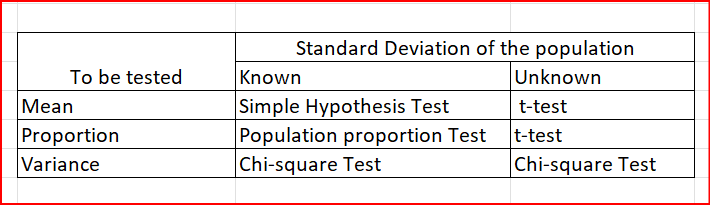

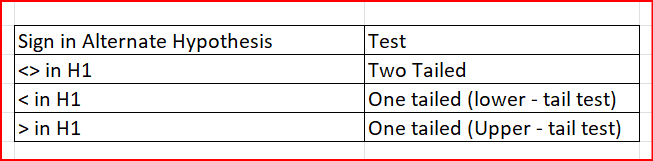

### Step 3 - Set value of alpha

Most commonly used confidence levels: 

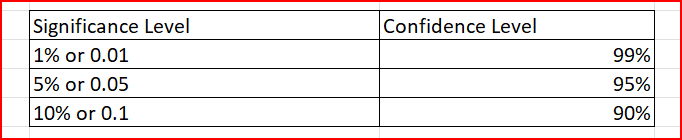

### Step 4 Establish the decsion rule

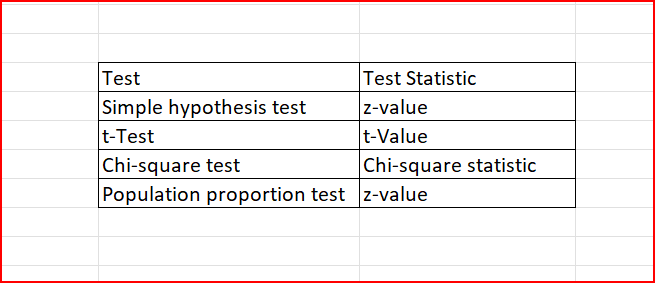

In [ ]:
import numpy as np
from scipy.stats import ttest_1samp

# Set seed for reproducibility
np.random.seed(42)

# Generate a sample of widget weights (assuming a normal distribution)
sample_weights = np.random.normal(loc=148, scale=12, size=30)

# Hypothesis testing
claimed_mean = 150
t_stat, p_value = ttest_1samp(sample_weights, claimed_mean)

# Interpret the results
alpha = 0.05
print(f'T-Statistic: {t_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence that the average weight is different.")
else:
    print("Fail to reject the null hypothesis. The average weight is not significantly different.")


Association Test (Independence):

"Are these two things related, or are they independent? If they're independent, changing one doesn't affect the other."

Goodness-of-Fit Test:

"Does what we see match what we expected? If yes, everything is as expected. If not, there might be something interesting going on."

### 4. A/B Test

A/B testing, also known as split testing, is a method of comparing two versions of a webpage, app, email, or other content to determine which one performs better. It's a powerful technique used in marketing, product development, and user experience optimization. Here's how it works:

1. Two Versions (A and B): A/B testing involves creating two versions of a webpage or other content: Version A (the control) and Version B (the variation). These versions differ in specific elements, such as design, text, colors, or calls-to-action.
2. Random Assignment: Users or visitors are randomly assigned to one of the versions. This randomization helps ensure that any differences in performance are due to the changes made and not other external factors.   
3. Performance Metrics: Define the key performance metrics or goals you want to measure. These could include click-through rates, conversion rates, time spent on page, or any other relevant metric depending on your goals.
4.  Data Collection: Collect data on how each version performs with respect to the chosen metrics. This data could be collected through analytics tools, tracking software, or other measurement methods.
5. Statistical Analysis: Use statistical analysis to determine whether the differences observed are statistically significant. Statistical significance helps you ensure that the observed changes are likely not due to random chance.
6. Decision-Making: Based on the analysis, make decisions about which version performs better. If there's a statistically significant difference, you may choose to implement the better-performing version.

**Key Considerations:**

* Sample Size: Ensure that your sample size is large enough to detect meaningful differences. Small sample sizes may lead to inconclusive or unreliable results.Large sample sizes required for minimum detectable effect and small sample sizes for detecting coarse changes. It will also depend on the statistical significance needed.
Sample size calculator: https://www.evanmiller.org/ab-testing/sample-size.html 
* Duration: Run the test for a sufficient duration to capture variations over time, considering factors like day of the week or seasonality. For example: i want to have a sample size of 1M customers, avg CTR for a day is 10000, duration required would be 1M/10000= 100 days
* Segmentation: Consider segmenting your audience based on relevant characteristics (e.g., new vs. returning visitors) to identify how different groups respond to changes.
* Ethical Considerations: Be mindful of ethical considerations, especially when conducting tests that directly impact user experience or engagement.

Example:

Suppose an e-commerce website wants to test two different versions of its product page to see which one leads to more purchases. Version A might have a traditional layout, while Version B could have a new design with a prominent "Buy Now" button. The A/B test would measure which version results in a higher conversion rate.
A/B testing is a valuable tool for making data-driven decisions and optimizing various aspects of digital experiences. It allows businesses to experiment, iterate, and continually improve based on user behavior and preferences.

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Set seed for reproducibility
np.random.seed(42)

# Simulate data for two groups (A and B)
group_A_clicks = np.random.binomial(n=1, p=0.1, size=1000)  # Click-throughs in group A
group_B_clicks = np.random.binomial(n=1, p=0.12, size=1000)  # Click-throughs in group B

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(group_A_clicks, group_B_clicks)

# Significance level
alpha = 0.05

# Interpret the results
print(f'T-Statistic: {t_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence of a difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


## A/B Testing Use Cases in Finance

### Product Management in Finance

#### Interface and User Experience (UX) Design
- Test different designs of a financial dashboard to optimize user engagement.
- Experiment with formats of financial reports/statements for user-friendliness.

#### Feature Testing
- Introduce and measure new tools/features in banking apps, like budget trackers.
- Compare robo-advisor algorithms for customer satisfaction and outcomes.

#### Pricing Strategies
- Test different pricing models for premium financial services.
- Experiment with fee structures for investment products.

#### Payment and Checkout Processes
- Optimize online payment processes to reduce transaction abandonment.
- Test security authentication methods balancing security and convenience.

#### Personalization
- Tailor banking app homepages based on user behavior and measure impact.
- Offer customized financial advice and measure effectiveness.

### Customer Acquisition in Finance

#### Marketing and Promotional Offers
- Test sign-up incentives for new banking or brokerage accounts.
- Experiment with referral bonus amounts for new customer acquisition.

#### Advertising Strategies
- Compare ad copy or visuals in online advertising campaigns.
- A/B test target demographics/platforms for digital marketing.

#### Website and Landing Page Optimization
- Test different landing page designs for new financial products.
- Experiment with calls-to-action (CTAs) on websites for engagement.

#### Email Marketing Campaigns
- Compare open and click-through rates with different email subject lines.
- Test personalized vs. generic email content for customer acquisition.

#### Customer Onboarding Experience
- Experiment with onboarding processes for financial services.
- Test various educational content during onboarding for customer understanding.
